<a href="https://colab.research.google.com/github/RDifault/Machine-and-Deep-Learning-Projects/blob/main/Parkinson_Detection_using_ANN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##1. Import libraries yang diperlukan

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import keras
from keras.models import Sequential
from keras.layers import Dense
import seaborn as sn
from sklearn.preprocessing import StandardScaler

Read Dataset

In [ ]:
df = pd.read_csv('Parkinson_disease.csv')

df.head()

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,...,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,...,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,...,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,...,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,...,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              195 non-null    object 
 1   MDVP:Fo(Hz)       195 non-null    float64
 2   MDVP:Fhi(Hz)      195 non-null    float64
 3   MDVP:Flo(Hz)      195 non-null    float64
 4   MDVP:Jitter(%)    195 non-null    float64
 5   MDVP:Jitter(Abs)  195 non-null    float64
 6   MDVP:RAP          195 non-null    float64
 7   MDVP:PPQ          195 non-null    float64
 8   Jitter:DDP        195 non-null    float64
 9   MDVP:Shimmer      195 non-null    float64
 10  MDVP:Shimmer(dB)  195 non-null    float64
 11  Shimmer:APQ3      195 non-null    float64
 12  Shimmer:APQ5      195 non-null    float64
 13  MDVP:APQ          195 non-null    float64
 14  Shimmer:DDA       195 non-null    float64
 15  NHR               195 non-null    float64
 16  HNR               195 non-null    float64
 1

In [ ]:
x_data = df.drop(['status', 'name'], axis=1)
y_data = df['status']

x_data

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,MDVP:APQ,Shimmer:DDA,NHR,HNR,RPDE,DFA,spread1,spread2,D2,PPE
0,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,0.426,...,0.02971,0.06545,0.02211,21.033,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,0.626,...,0.04368,0.09403,0.01929,19.085,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,0.482,...,0.03590,0.08270,0.01309,20.651,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,0.517,...,0.03772,0.08771,0.01353,20.644,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,0.584,...,0.04465,0.10470,0.01767,19.649,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
190,174.188,230.978,94.261,0.00459,0.00003,0.00263,0.00259,0.00790,0.04087,0.405,...,0.02745,0.07008,0.02764,19.517,0.448439,0.657899,-6.538586,0.121952,2.657476,0.133050
191,209.516,253.017,89.488,0.00564,0.00003,0.00331,0.00292,0.00994,0.02751,0.263,...,0.01879,0.04812,0.01810,19.147,0.431674,0.683244,-6.195325,0.129303,2.784312,0.168895
192,174.688,240.005,74.287,0.01360,0.00008,0.00624,0.00564,0.01873,0.02308,0.256,...,0.01667,0.03804,0.10715,17.883,0.407567,0.655683,-6.787197,0.158453,2.679772,0.131728
193,198.764,396.961,74.904,0.00740,0.00004,0.00370,0.00390,0.01109,0.02296,0.241,...,0.01588,0.03794,0.07223,19.020,0.451221,0.643956,-6.744577,0.207454,2.138608,0.123306


In [ ]:
y_data = y_data.to_numpy()
y_data

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

Show Correlation

In [ ]:
df_corr = df.corr()['status'].abs().sort_values(ascending=False)
df_corr

status              1.000000
spread1             0.564838
PPE                 0.531039
spread2             0.454842
MDVP:Fo(Hz)         0.383535
MDVP:Flo(Hz)        0.380200
MDVP:Shimmer        0.367430
MDVP:APQ            0.364316
HNR                 0.361515
Shimmer:APQ5        0.351148
MDVP:Shimmer(dB)    0.350697
Shimmer:APQ3        0.347617
Shimmer:DDA         0.347608
D2                  0.340232
MDVP:Jitter(Abs)    0.338653
RPDE                0.308567
MDVP:PPQ            0.288698
MDVP:Jitter(%)      0.278220
MDVP:RAP            0.266668
Jitter:DDP          0.266646
DFA                 0.231739
NHR                 0.189429
MDVP:Fhi(Hz)        0.166136
Name: status, dtype: float64

Show Correlation Matrix untuk melihat hubungan data

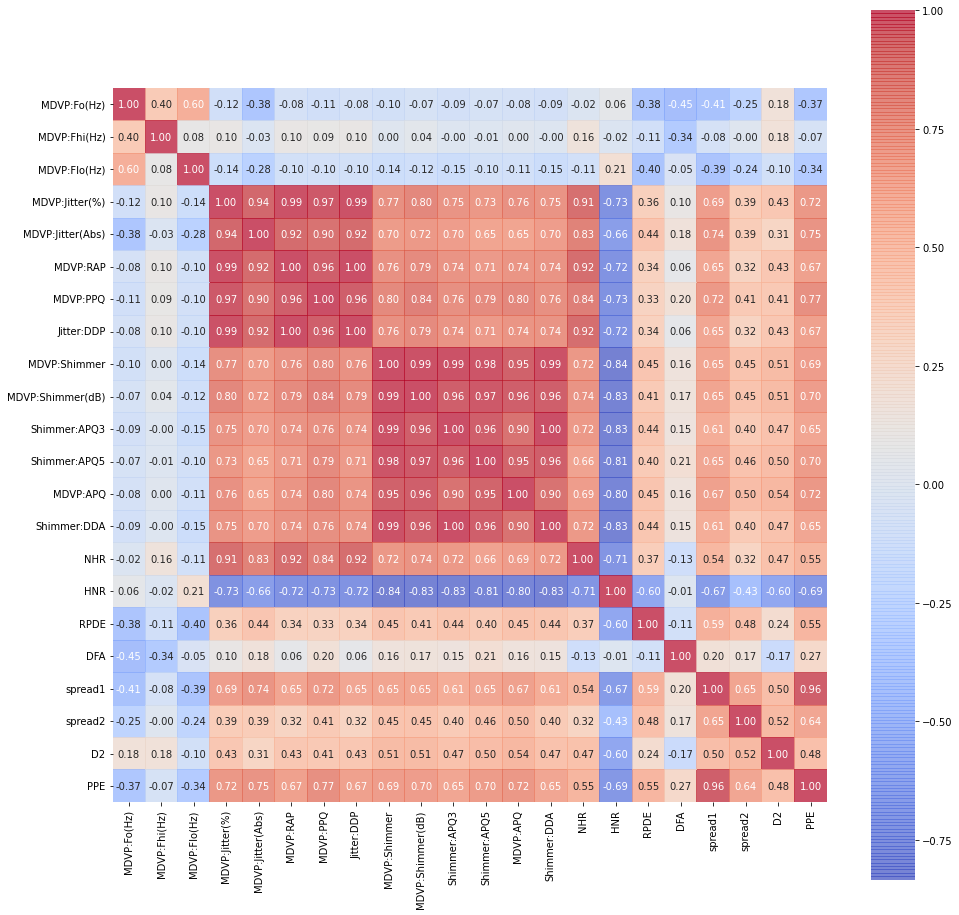

In [ ]:
plt.figure(figsize=(16,16))
sn.heatmap(x_data.corr(), cbar = True,  square = True, annot=True, fmt= '.2f',
           alpha = 0.7,   cmap= 'coolwarm')
plt.show()

#Feature Engineering

##Min-Max Scaler

Normalisasi data menggunakan Min-Max Scaler

> Min-Max Scaler digunakan untuk mengubah seluruh data menjadi value diantara -1 dan 1





In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler=MinMaxScaler((-1,1))
x_data2 = scaler.fit_transform(x_data)

x_data2

array([[-0.63138346, -0.77481654, -0.89037042, ...,  0.17153026,
        -0.21867743, -0.0053808 ],
       [-0.6033463 , -0.81013911, -0.4433544 , ...,  0.48267409,
        -0.05370956,  0.34265204],
       [-0.66992292, -0.88174367, -0.46942324, ...,  0.37274182,
        -0.18236124,  0.19336492],
       ...,
       [ 0.00546073, -0.43717403, -0.89854572, ..., -0.31484696,
         0.11793486, -0.63884033],
       [ 0.28578581,  0.20361309, -0.89144127, ..., -0.09423055,
        -0.36355605, -0.67372646],
       [ 0.46654868, -0.35441175, -0.85610326, ..., -0.16981039,
         0.00734563, -0.5690805 ]])

##PCA

Feature Engineering kedua adalah menerapkan Principal Component Analysis


> PCA merupakan sebuah teknik untuk mereduksi dimensi data agar data-data yang tidak berhubungan dikeluarkan, dan proses Machine Learning bisa berjalan lebih cepat.





In [ ]:
# scaler = StandardScaler().fit(x_data)
# x_data = scaler.transform(x_data)

# x_data

Dimensi di reduksi dari 22 dimensi menjadi 12 dimensi saja

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components=12)
pca_features = pca.fit_transform(x_data2)

In [ ]:
pca_df = pd.DataFrame(
    data=pca_features,
    columns=['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7', 'PC8', 'PC9', 'PC10', 'PC11', 'PC12'])

pca_df

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12
0,0.766035,-0.542691,-0.780464,0.213095,0.227441,-0.483798,-0.041986,0.071944,0.100109,-0.140912,-0.082415,0.004018
1,1.665666,-0.188898,-0.985257,-0.265197,0.265753,-0.409292,0.062518,-0.042657,0.348497,-0.143367,-0.057153,-0.023091
2,1.315899,-0.304202,-1.088593,0.011998,0.292052,-0.211649,-0.012312,-0.057392,0.204009,-0.177076,-0.062710,-0.057656
3,1.455674,-0.315184,-1.022863,-0.114181,0.367234,-0.280316,-0.009087,-0.076448,0.344224,-0.190751,-0.071333,-0.112174
4,1.907704,-0.123818,-1.257042,0.231673,0.123055,-0.262755,-0.022860,0.161739,0.589421,-0.116030,0.010528,-0.125489
...,...,...,...,...,...,...,...,...,...,...,...,...
190,0.001585,0.512648,0.310042,0.251880,-0.585889,-0.633287,-0.177182,-0.044568,0.100284,0.225948,-0.008133,0.007796
191,-0.267139,0.571165,0.382574,0.314885,-0.080008,-0.505969,-0.296309,0.401662,-0.128030,0.123848,-0.024999,-0.052210
192,0.029823,0.459512,0.447550,1.040750,-0.056343,-0.043590,-0.497136,-0.083602,-0.506754,0.127713,-0.204401,0.151161
193,-0.362218,0.547523,0.800329,0.761475,-0.000015,-0.326425,0.285123,0.006053,-0.276902,-0.222735,-0.334509,0.140241


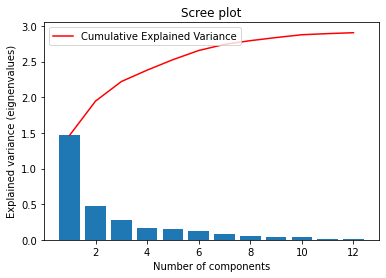

In [ ]:
plt.bar(
    range(1,len(pca.explained_variance_)+1),
    pca.explained_variance_
    )

plt.plot(
    range(1,len(pca.explained_variance_ )+1),
    np.cumsum(pca.explained_variance_),
    c='red',
    label='Cumulative Explained Variance')

plt.legend(loc='upper left')
plt.xlabel('Number of components')
plt.ylabel('Explained variance (eignenvalues)')
plt.title('Scree plot')

plt.show()

In [ ]:
pca.explained_variance_ratio_

array([0.50268407, 0.16337416, 0.09385052, 0.05474926, 0.05027985,
       0.04410452, 0.02952223, 0.01768095, 0.01497833, 0.0135256 ,
       0.00530147, 0.00441702])

Setelah direduksi, 12 data tersebut sudah mewakili 99% dari dataset yang asli

In [ ]:
print("Cumulative Variances (Percentage):")
print(pca.explained_variance_ratio_.cumsum() * 100)
print()

Cumulative Variances (Percentage):
[50.26840744 66.60582314 75.99087526 81.46580124 86.49378577 90.90423791
 93.85646057 95.62455567 97.12238838 98.47494816 99.00509482 99.44679691]



#Model

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test,  y_train, y_test = train_test_split(x_data2, y_data, test_size=0.3)
# x_train, x_test,  y_train, y_test = train_test_split(pca_features, y_data, test_size=0.3)
# x_train, x_test,  y_train, y_test = train_test_split(x_data, y_data, test_size=0.3)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

NameError: ignored

Menggunakan 4 Hidden Layer dengan masing-masing neuron secara berurutan sebanyak 1024, 512, 256, 64

In [ ]:
model = Sequential()

#Hidden Layer pertama
model.add(Dense(1024, input_shape=(12,),name="HL-1", activation="relu"))

#Hidden Layer kedua
model.add(Dense(512, name="HL-2", activation="relu"))

#Hidden Layer ketiga
model.add(Dense(256, name="HL-3", activation="relu"))

#Hidden Layer keempat
model.add(Dense(64, name="HL-4", activation="relu"))

#Hidden Layer kelima
# model.add(Dense(64, name="HL-5", activation="relu"))

#Output layer
model.add(Dense(1, name="Output-Layer", activation="sigmoid"))

#Compile Model
model.compile(loss="binary_crossentropy", metrics=["accuracy"])

model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 HL-1 (Dense)                (None, 1024)              13312     
                                                                 
 HL-2 (Dense)                (None, 512)               524800    
                                                                 
 HL-3 (Dense)                (None, 256)               131328    
                                                                 
 HL-4 (Dense)                (None, 64)                16448     
                                                                 
 Output-Layer (Dense)        (None, 1)                 65        
                                                                 
Total params: 685,953
Trainable params: 685,953
Non-trainable params: 0
_________________________________________________________________


Model di-train sebanyak 20 epoch

Epoch 1/20
4/4 [==============================] - 1s 79ms/step - loss: 0.6226 - accuracy: 0.6111 - val_loss: 0.4484 - val_accuracy: 0.6786
Epoch 2/20
4/4 [==============================] - 0s 35ms/step - loss: 0.4276 - accuracy: 0.8056 - val_loss: 0.3278 - val_accuracy: 0.8929
Epoch 3/20
4/4 [==============================] - 0s 29ms/step - loss: 0.3435 - accuracy: 0.8611 - val_loss: 0.2702 - val_accuracy: 0.9286
Epoch 4/20
4/4 [==============================] - 0s 21ms/step - loss: 0.2951 - accuracy: 0.8611 - val_loss: 0.2125 - val_accuracy: 0.9643
Epoch 5/20
4/4 [==============================] - 0s 23ms/step - loss: 0.2613 - accuracy: 0.8889 - val_loss: 0.1840 - val_accuracy: 0.9643
Epoch 6/20
4/4 [==============================] - 0s 22ms/step - loss: 0.2024 - accuracy: 0.9259 - val_loss: 0.2330 - val_accuracy: 0.8571
Epoch 7/20
4/4 [==============================] - 0s 22ms/step - loss: 0.1944 - accuracy: 0.9259 - val_loss: 0.1208 - val_accuracy: 0.9643
Epoch 8/20
4/4 [===========

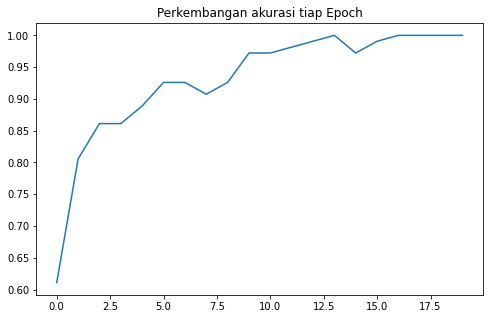

In [ ]:
import matplotlib.pyplot as plt

fitting=model.fit(x_train, y_train, epochs=20, verbose=1, validation_split=0.2)

pd.DataFrame(fitting.history)["accuracy"].plot(figsize=(8,5))
plt.title("Perkembangan akurasi tiap Epoch")
plt.show()

**Hasil dari training model menghasilkan akurasi sebesar 93% sampai 94%**

In [ ]:
model.evaluate(x_test, y_test)

2/2 [==============================] - 0s 9ms/step - loss: 0.3285 - accuracy: 0.9322


[0.32849422097206116, 0.9322034120559692]